# Diretórios e Bibliotecas

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
!pip install numpy pandas seaborn matplotlib scikit-learn joblib --quiet

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Dataframe

In [52]:
bootcamp_train_df = pd.read_csv('/content/drive/MyDrive/Bootcamp CDIA/model/data/real_normalized_data.csv')
bootcamp_train_df.head()

,x_minimo,x_maximo,y_minimo,y_maximo,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,maximo_da_luminosidade,comprimento_do_transportador,...,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,tipo_do_aço_A300,tipo_do_aço_A400,targets
0,0.010088,0.096019,0.005745,0.019629,0.002725,0.019639,0.021127,0.003126,0.375000,0.241623,...,0.302568,0.315567,0.388761,0.403242,0.537584,0.206683,0.078776,0,1.0,7.0
1,0.073431,0.315574,0.040413,0.138076,0.005411,0.005499,0.026761,0.000588,0.414773,0.238095,...,0.124762,0.196206,0.251801,0.359553,0.531924,0.020485,0.072266,0,1.0,8.0
2,0.002686,0.123536,0.061259,0.209306,0.248529,0.214454,0.185915,0.215403,0.278409,0.231041,...,0.833310,0.700299,0.643120,0.173124,0.351036,1.000000,0.024740,0,1.0,3.0
3,0.008450,0.088993,0.001807,0.006174,0.010665,0.029065,0.033803,0.010999,0.329545,0.238095,...,0.458638,0.413328,0.460627,0.341354,0.472821,0.796635,0.072266,0,1.0,3.0
4,0.028560,0.255855,0.112279,0.040608,0.002251,0.011783,0.021127,0.001950,0.221591,0.227513,...,0.281659,0.172082,0.443264,0.835084,0.332973,0.093957,0.055990,0,0.0,8.0


In [53]:
X = bootcamp_train_df.drop('targets', axis=1)
y = bootcamp_train_df['targets']

# Divisão de Subconjuntos

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    train_size=0.80)

# Treinamento do Modelo

In [55]:
def build_randomize_search():
  params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False]
  }

  return RandomizedSearchCV(
      estimator=SVC(probability=True, decision_function_shape='ovr'),
      param_distributions=params,
      scoring='accuracy',
      return_train_score=True,
      n_iter=16,
      refit=True
  )

In [56]:
first_randomized_search = build_randomize_search()
first_randomized_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=16,
                   param_distributions={'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='accuracy')

In [57]:
first_model_pred = first_randomized_search.predict(x_test)

In [58]:
print(classification_report(y_test, first_model_pred))

              precision    recall  f1-score   support

         3.0       0.95      0.96      0.95       129
         5.0       0.83      0.26      0.40        19
         6.0       0.53      0.57      0.55       161
         7.0       0.58      0.66      0.61       234
         8.0       0.81      0.58      0.68       127

    accuracy                           0.67       670
   macro avg       0.74      0.61      0.64       670
weighted avg       0.69      0.67      0.67       670



In [59]:
metrics = confusion_matrix(y_test, first_model_pred)

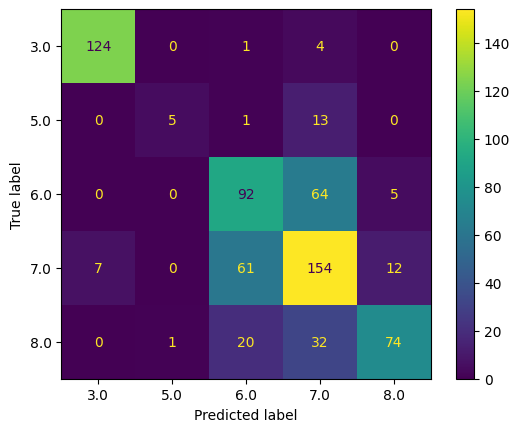

In [60]:
ConfusionMatrixDisplay(confusion_matrix=metrics,
                              display_labels=first_model.classes_).plot()

In [61]:
first_model = first_randomized_search.best_estimator_
first_model

SVC(kernel='poly', probability=True)

In [62]:
first_model.predict_proba(x_test)

array([[9.64108565e-01, 2.81123924e-05, 2.93759530e-03, 3.13516911e-02,
        1.57403612e-03],
       [8.59925867e-01, 4.36543516e-04, 2.02420138e-02, 1.14878685e-01,
        4.51689133e-03],
       [3.44721669e-01, 1.87660946e-03, 3.50832672e-01, 2.89267316e-01,
        1.33017337e-02],
       ...,
       [2.70871212e-03, 1.19784665e-02, 2.48925791e-01, 5.38588130e-01,
        1.97798901e-01],
       [9.99131076e-01, 3.48135825e-05, 3.52207111e-05, 7.59752645e-04,
        3.91373940e-05],
       [7.52098805e-04, 1.07677447e-02, 4.27792679e-01, 4.97150597e-01,
        6.35368797e-02]])

In [64]:
joblib.dump(first_model, 'svm67.pkl')

['svm67.pkl']